In [4]:
import pandas as pd
import seaborn as sns
from collections import Counter

In [5]:
df = pd.read_csv('fake_job_postings.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


In [10]:
df.salary_range.unique()

array([nan, '20000-28000', '100000-120000', '120000-150000',
       '50000-65000', '40000-50000', '60-80', '65000-70000', '75-115',
       '75000-110000', '17000-20000', '16000-28000', '95000-115000',
       '15000-18000', '50000-70000', '45000-60000', '30000-40000',
       '70000-90000', '10000-14000', '50-110', '28000-45000', '0-34300',
       '35000-40000', '9-Dec', '44000-57000', '18500-28000',
       '55000-75000', '30000-35000', '0-0', '20000-40000',
       '360000-600000', '50000-80000', '80000-100000', '52000-78000',
       '15750-15750', '40000-65000', '45000-50000', '30000-37000',
       '45000-67000', '35000-100000', '180000-216000', '45000-65000',
       '28000-32000', '0-1000', '36000-40000', '80000-110000',
       '35000-73000', '19000-19000', '60000-120000', '120000-15000000',
       '42000-55000', '90000-120000', '100000-150000', '28000-38000',
       '1600-1700', '50000-60000', '30000-70000', '32000-40000', '50-100',
       '9000-17000', '23040-28800', '105-110', '1300

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Most common words in fake job posting

In [7]:
f_title=[]
for f_t in df[df.fraudulent==1].title.str.split():
    for word in f_t:
        f_title.append(word)
Counter(f_title).most_common(30)

[('Entry', 95),
 ('Data', 92),
 ('-', 75),
 ('Engineer', 75),
 ('Assistant', 72),
 ('Home', 66),
 ('Payroll', 62),
 ('Clerk', 57),
 ('Positions', 55),
 ('Manager', 54),
 ('Administrative', 49),
 ('Customer', 48),
 ('Sales', 46),
 ('Service', 45),
 ('Representative', 40),
 ('Based', 36),
 ('Earn', 31),
 ('Daily', 31),
 ('Technician', 30),
 ('Staff', 29),
 ('Position', 29),
 ('&', 28),
 ('Senior', 28),
 ('$100-$200', 28),
 ('Work', 27),
 ('From', 27),
 ('Director', 26),
 ('for', 26),
 ('and', 24),
 ('of', 23)]

In [14]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 


In [10]:
stopwords = set(STOPWORDS) 


In [12]:
toekns = df.title[0].split()
" ".join(tokens)+" "

'marketing intern '

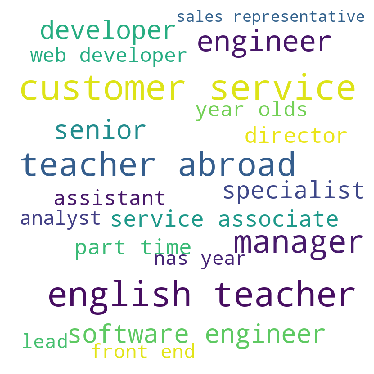

In [19]:
comment_words=''
for val in df.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, font_step = 2,
                background_color ='white', max_words = 20,
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

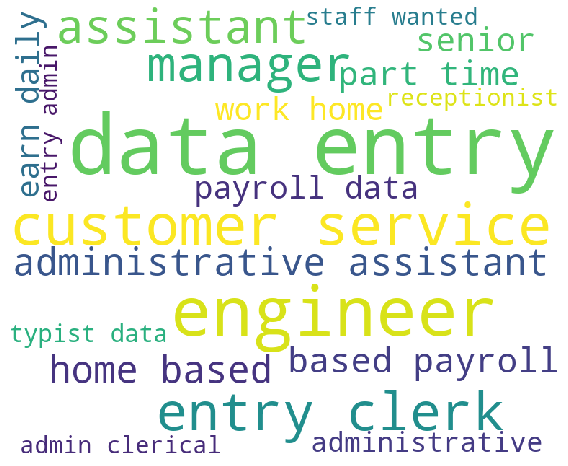

In [23]:
comment_words=''
for val in df[df.fraudulent==1].title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 769, height = 628, font_step = 2,
                background_color ='white', max_words = 20,
                stopwords = stopwords, 
                min_font_size = 5).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (7.69, 6.28), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('wordcloud.png')
plt.show() 

In [24]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/eliu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
stemmer = SnowballStemmer('english')

In [29]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [30]:
processed_docs = df['title'].map(preprocess)


In [31]:
processed_docs

0                                         [market, intern]
1                  [custom, servic, cloud, video, product]
2                             [commiss, machineri, assist]
3                            [account, execut, washington]
4                                          [review, manag]
                               ...                        
17875                       [account, director, distribut]
17876                                    [payrol, account]
17877    [project, cost, control, staff, engin, cost, c...
17878                                    [graphic, design]
17879                                    [applic, develop]
Name: title, Length: 17880, dtype: object

In [32]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 intern
1 market
2 cloud
3 custom
4 product
5 servic
6 video
7 assist
8 commiss
9 machineri
10 account


In [33]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)


In [34]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [35]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.7783273070218419), (1, 0.6278587445788483)]


In [42]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word=dictionary, passes=2, workers=2)

In [43]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.152*"develop" + 0.089*"assist" + 0.052*"administr" + 0.052*"offic" + 0.037*"busi" + 0.033*"year" + 0.032*"old" + 0.027*"apprenticeship" + 0.024*"time" + 0.020*"manag"
Topic: 1 
Words: 0.088*"develop" + 0.064*"entri" + 0.047*"data" + 0.044*"posit" + 0.036*"home" + 0.030*"center" + 0.028*"level" + 0.027*"lead" + 0.025*"work" + 0.024*"time"
Topic: 2 
Words: 0.115*"custom" + 0.106*"servic" + 0.089*"engin" + 0.077*"senior" + 0.068*"softwar" + 0.055*"develop" + 0.041*"associ" + 0.033*"specialist" + 0.026*"technic" + 0.021*"repres"
Topic: 3 
Words: 0.114*"account" + 0.069*"manag" + 0.052*"oper" + 0.051*"titl" + 0.043*"execut" + 0.038*"support" + 0.038*"analyst" + 0.037*"data" + 0.031*"busi" + 0.027*"insur"
Topic: 4 
Words: 0.124*"engin" + 0.123*"manag" + 0.080*"design" + 0.058*"product" + 0.044*"project" + 0.030*"senior" + 0.029*"junior" + 0.026*"develop" + 0.022*"closer" + 0.021*"execut"
Topic: 5 
Words: 0.150*"manag" + 0.122*"market" + 0.079*"sale" + 0.036*"intern" + 0.02

In [38]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.088*"design" + 0.077*"custom" + 0.076*"servic" + 0.050*"associ" + 0.049*"engin" + 0.032*"technic" + 0.031*"specialist" + 0.026*"director" + 0.021*"graphic" + 0.020*"time"
Topic: 1 Word: 0.107*"manag" + 0.045*"oper" + 0.043*"junior" + 0.031*"account" + 0.030*"custom" + 0.030*"offic" + 0.027*"product" + 0.026*"engin" + 0.026*"lead" + 0.023*"servic"
Topic: 2 Word: 0.086*"market" + 0.078*"sale" + 0.045*"manag" + 0.020*"execut" + 0.019*"associ" + 0.018*"director" + 0.017*"level" + 0.016*"mainten" + 0.016*"posit" + 0.016*"engin"
Topic: 3 Word: 0.263*"develop" + 0.038*"busi" + 0.036*"mobil" + 0.031*"java" + 0.026*"android" + 0.019*"softwar" + 0.016*"design" + 0.016*"execut" + 0.015*"year" + 0.015*"apprenticeship"
Topic: 4 Word: 0.079*"account" + 0.053*"execut" + 0.046*"coordin" + 0.028*"senior" + 0.027*"manag" + 0.025*"time" + 0.021*"financ" + 0.018*"produc" + 0.015*"sale" + 0.015*"engin"
Topic: 5 Word: 0.092*"teacher" + 0.086*"english" + 0.085*"abroad" + 0.057*"manag" + 0.05

In [44]:
import pyLDAvis.gensim
lda_display_bow = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display_bow)

/Users/eliu/opt/anaconda3/envs/usf/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [40]:
lda_display = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/eliu/opt/anaconda3/envs/usf/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [55]:
df['entry_test']=[1 if '$' in str.lower(title) else 0 for title in df.title]

In [59]:
df[['title','entry_test']][df.entry_test==0]

,title,entry_test
0,Marketing Intern,0
1,Customer Service - Cloud Video Production,0
2,Commissioning Machinery Assistant (CMA),0
3,Account Executive - Washington DC,0
4,Bill Review Manager,0
...,...,...
17875,Account Director - Distribution,0
17876,Payroll Accountant,0
17877,Project Cost Control Staff Engineer - Cost Con...,0
17878,Graphic Designer,0


In [ ]:
def add_title_flag(df):
    df['title_data_entry'] = [1 if 'entry' in str.lower(title) and 'data' in str.lower(title) 
                              else 0 for title in df.title]
    df['title_home'] = [1 if 'work from home' in str.lower(title) or 'home based' in str.lower(title) 
                        else 0 for title in df.title]
    df['title_dollar'] = [1 if '$' in title else 0 for title in df.title]

In [60]:
f_title2=[]
for f_t in df[df.fraudulent==1].title:
    f_title2.append(f_t)

Counter(f_title2).most_common(30)

[('Data Entry Admin/Clerical Positions - Work From Home', 21),
 ('Cruise Staff Wanted *URGENT*', 21),
 ('Home Based Payroll Typist/Data Entry Clerks Positions Available', 21),
 ('Customer Service Representative', 17),
 ('Administrative Assistant', 16),
 ('Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily ', 12),
 ('Payroll Data Coordinator Positions - Earn $100-$200 Daily ', 10),
 ('Account Sales Managers $80-$130,000/yr', 10),
 ('Payroll Clerk', 10),
 ('Network Marketing', 10),
 ('Agency Sales Managers $150-$175,000/yr', 9),
 ('Data Entry', 9),
 ('Executive Chef', 6),
 ('Call Center Representative', 6),
 (' Payroll Data Entry Clerk Position - Earn $100-$200 Daily ', 6),
 ('Lawn and Maintenance Contractors ', 6),
 ('Property Preservation Field Crews', 5),
 ('Customer Assistant', 4),
 ('Customer Service Rep', 4),
 ('Optical Sales', 4),
 ('Call Center Representative I', 4),
 ('Senior Engineering Product Manager', 3),
 ('Structural Engineer', 3),
 ('Director of Technical

## Most common words in real job posting

In [7]:
t_title=[]
for t_t in df[df.fraudulent==0].title.str.split():
    for word in t_t:
        t_title.append(word)
Counter(t_title).most_common(20)

[('Manager', 2008),
 ('-', 1876),
 ('Developer', 1606),
 ('Engineer', 1451),
 ('Sales', 1187),
 ('Senior', 913),
 ('Customer', 888),
 ('Service', 817),
 ('Teacher', 772),
 ('English', 771),
 ('Marketing', 735),
 ('Abroad', 692),
 ('Associate', 621),
 ('Software', 611),
 ('/', 567),
 ('Designer', 540),
 ('Assistant', 530),
 ('&', 509),
 ('and', 508),
 ('Business', 497)]

In [8]:
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

NameError: name 'a' is not defined

In [ ]:
t_title

In [24]:
df['title_len'] = [len(x) for x in df.title.str.split()]

In [25]:
df[['title','title_len']]

,title,title_len
0,Marketing Intern,2
1,Customer Service - Cloud Video Production,6
2,Commissioning Machinery Assistant (CMA),4
3,Account Executive - Washington DC,5
4,Bill Review Manager,3
...,...,...
17875,Account Director - Distribution,4
17876,Payroll Accountant,2
17877,Project Cost Control Staff Engineer - Cost Con...,11
17878,Graphic Designer,2


In [33]:
df.groupby('fraudulent').agg({'title_len':'mean'})

,title_len
fraudulent,
0,3.748971
1,4.016166


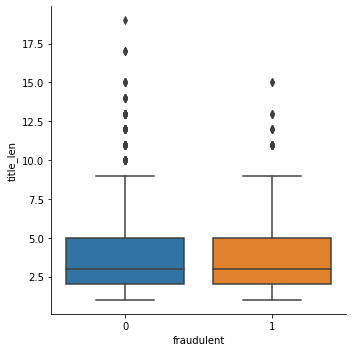

In [36]:
ax = sns.catplot(x="fraudulent", y="title_len",kind="box", data=df)
